In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import os
from datetime import datetime

print("success.")

success.


### Part 1 - Data Import & Initial Exploration

In [2]:
# Load datasets
survey_df = pd.read_csv(r"C:\Users\P319970\git_delivery\git__project1\data\raw\survey-results-public.csv")
schema_df = pd.read_csv(r"C:\Users\P319970\git_delivery\git__project1\data\raw\survey-results-schema.csv")

print("shape of survey data:", survey_df.shape)
print("shape of schema data:", schema_df.shape)

shape of survey data: (51392, 154)
shape of schema data: (154, 2)


In [3]:
# Display first rows of survey data
survey_df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


In [4]:
# Display first rows of schema data
display(schema_df.head(3))

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...


### Part 2 – Basic Information & Missing Values

In [5]:
# Basic structure of the dataset
print("Shape of the dataset:", survey_df.shape)  # (rows, columns)

# Data types and non-null counts
survey_df.info()

# Quick look at missing values
missing = survey_df.isnull().sum().sort_values(ascending=False)
print("\nTop 20 columns with missing values:")
print(missing.head(20))

Shape of the dataset: (51392, 154)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB

Top 20 columns with missing values:
ExCoder10Years          50475
ExCoderNotForMe         50471
ExCoderWillNotCode      50470
ExCoderBalance          50469
ExCoderReturn           50469
ExCoderBelonged         50464
ExCoderActive           50462
ExCoderSkills           50457
YearsCodedJobPast       50418
MobileDeveloperType     49839
ExpectedSalary          48826
TimeAfterBootcamp       48790
NonDeveloperType        46502
WebDeveloperType        40696
Salary                  38501
Overpaid                38005
HaveWorkedFramework     31163
HoursPerWeek            30792
Currency                29984
InfluenceConsultants    29847
dtype: int64


### Part 3 – Select Relevant Columns

In [6]:
# Define columns relevant for our research questions
relevant_cols = [
    "Country",
    "FormalEducation",
    "HaveWorkedLanguage",
    "JobSatisfaction",
    "Salary"
]

# Create a clean working copy for analysis
survey_clean_df = survey_df[relevant_cols].copy()

print("Shape of the reduced dataset:", survey_clean_df.shape)

# Preview first few rows
survey_clean_df.head()

Shape of the reduced dataset: (51392, 5)


,Country,FormalEducation,HaveWorkedLanguage,JobSatisfaction,Salary
0,United States,Secondary school,Swift,NaN,NaN
1,United Kingdom,Some college/university study without earning ...,JavaScript; Python; Ruby; SQL,NaN,NaN
2,United Kingdom,Bachelor's degree,Java; PHP; Python,9.0,113750.0
3,United States,Doctoral degree,Matlab; Python; R; SQL,3.0,NaN
4,Switzerland,Master's degree,NaN,8.0,NaN


### Part 4 – Clean & Prepare Data

In [7]:
# Handle missing values
survey_clean_df = survey_clean_df.dropna(subset=["Salary", "Country"])
survey_clean_df.reset_index(drop=True, inplace=True)

# Convert Salary to numeric
survey_clean_df["Salary"] = (
    survey_clean_df["Salary"]
    .astype(str)                            # ensure string type
    .replace("[^0-9.]", "", regex=True)     # remove non-numeric characters
    .replace("", np.nan)                    # empty strings → NaN
    .astype(float)                          # convert to float
)

# Drop rows with invalid salary values (0 or NaN)
survey_clean_df = survey_clean_df.dropna(subset=["Salary"])
survey_clean_df = survey_clean_df[survey_clean_df["Salary"] > 0]

# Display summary
print("After cleaning:")
print("Rows:", survey_clean_df.shape[0])
display(survey_clean_df["Salary"].describe())


After cleaning:
Rows: 12885


count     12885.000000
mean      56324.696464
std       39871.676322
min           0.014682
25%       26515.151515
50%       50000.000000
75%       80000.000000
max      197000.000000
Name: Salary, dtype: float64

### Part 5 – Exploratory Data Analysis (EDA)

EDA dataset shape: (11776, 5)


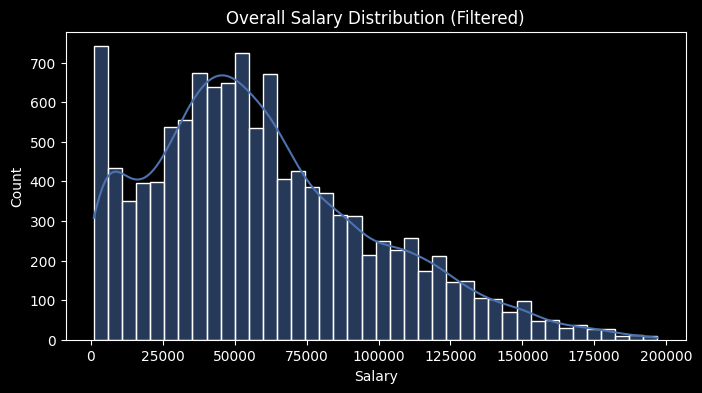

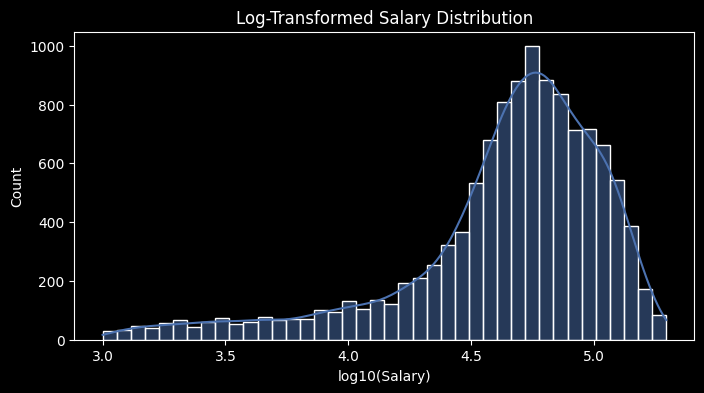


Top 10 countries by median salary:


Country
United States    94250.000000
Switzerland      90500.000000
Norway           71770.334928
Israel           70000.000000
Australia        67045.454545
Denmark          66666.666667
Ireland          62365.591398
New Zealand      60714.285714
Germany          53548.387097
Canada           53030.303030
Name: Salary, dtype: float64

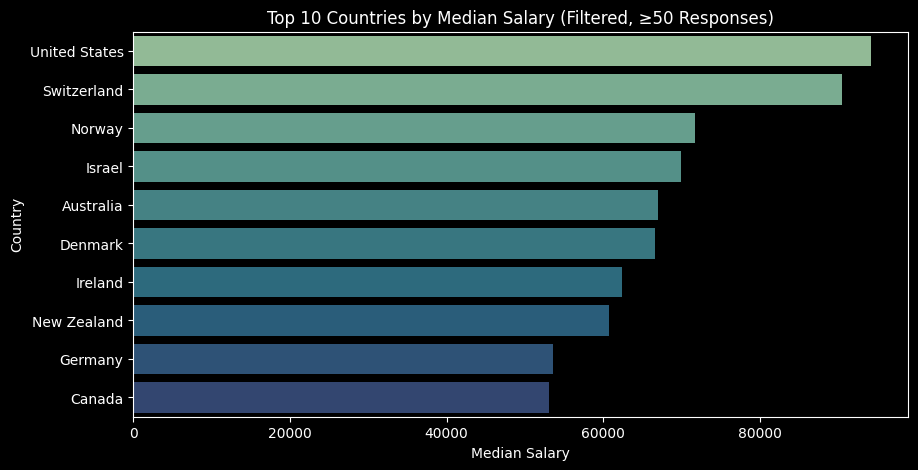

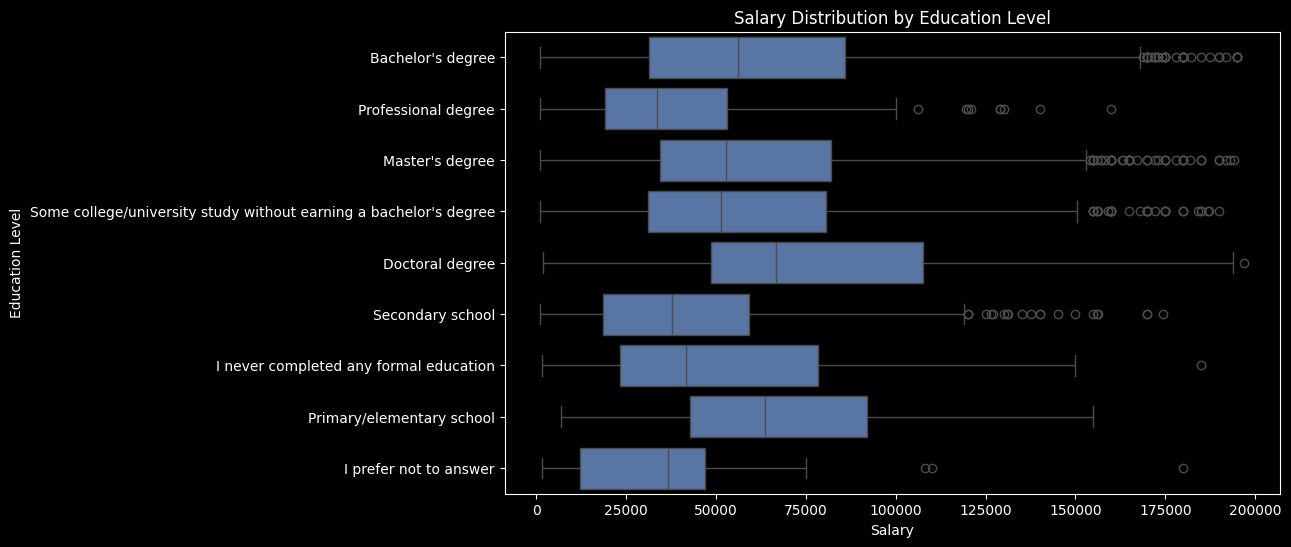

Filtered language dataset shape: (40542, 2)

Top 10 programming languages by median salary (filtered):


HaveWorkedLanguage
Clojure         74000.000000
Elixir          70606.060606
Go              68181.818182
Rust            67269.984917
F#              66329.185520
Perl            64516.129032
Groovy          63492.389963
Ruby            62903.225806
Scala           62500.000000
CoffeeScript    62250.000000
Name: Salary, dtype: float64

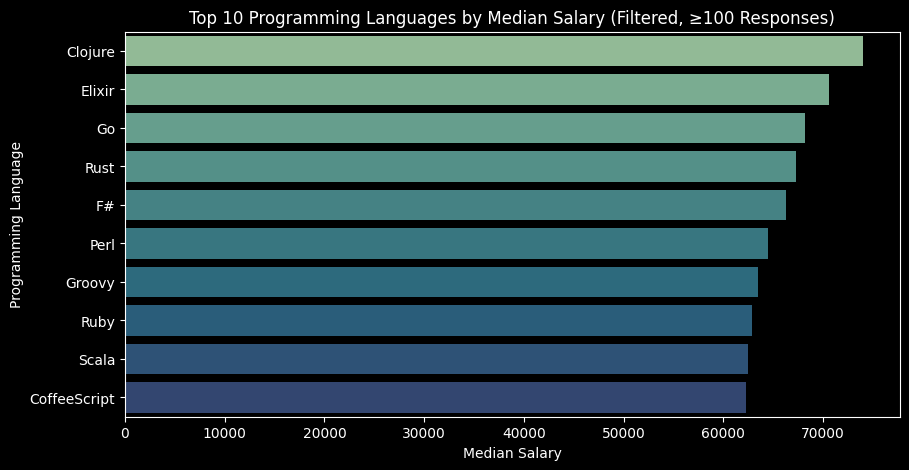

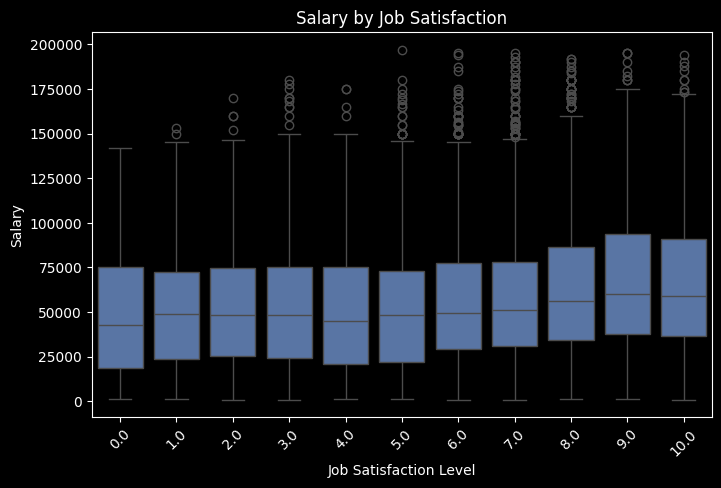

In [8]:
# plot style
plt.style.use("dark_background")
sns.set_palette("deep")

# Prepare filtered DataFrame for EDA, keep only countries with sufficient data and reasonable salary range
country_counts = survey_clean_df["Country"].value_counts()
valid_countries = country_counts[country_counts >= 50].index

eda_df = survey_clean_df[
    (survey_clean_df["Country"].isin(valid_countries)) &
    (survey_clean_df["Salary"].between(1000, 250000))
].copy()

print("EDA dataset shape:", eda_df.shape)



# Salary Distribution
plt.figure(figsize=(8, 4))
sns.histplot(eda_df["Salary"], bins=40, kde=True)
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("Overall Salary Distribution (Filtered)")
plt.show()



# log-transformed distribution
plt.figure(figsize=(8, 4))
sns.histplot(np.log10(eda_df["Salary"]), bins=40, kde=True)
plt.xlabel("log10(Salary)")
plt.ylabel("Count")
plt.title("Log-Transformed Salary Distribution")
plt.show()



# Salary by Country (Top10)
median_salary_by_country = (
    eda_df.groupby("Country")["Salary"]
    .median()
    .sort_values(ascending=False)
)

top10_countries = median_salary_by_country.head(10)
print("\nTop 10 countries by median salary:")
display(top10_countries)

# Build a small DF so we can use hue
country_plot_df = top10_countries.reset_index()
country_plot_df.columns = ["Country", "MedianSalary"]

plt.figure(figsize=(10, 5))
sns.barplot(
    data=country_plot_df,
    x="MedianSalary",
    y="Country",
    hue="Country",        
    legend=False,
    orient="h",
    palette="crest"
)
plt.xlabel("Median Salary")
plt.ylabel("Country")
plt.title("Top 10 Countries by Median Salary (Filtered, ≥50 Responses)")
plt.show()


# Salary by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=eda_df, x="Salary", y="FormalEducation", orient="h")
plt.xlabel("Salary")
plt.ylabel("Education Level")
plt.title("Salary Distribution by Education Level")
plt.show()



# Salary by Programming Language (Top10 filtered)
# Split multi-language responses and explode
lang_df = (
    eda_df[["HaveWorkedLanguage", "Salary"]]
    .dropna(subset=["HaveWorkedLanguage"])
    .copy()
)

lang_df["HaveWorkedLanguage"] = lang_df["HaveWorkedLanguage"].str.split(";")
lang_df = lang_df.explode("HaveWorkedLanguage")
lang_df["HaveWorkedLanguage"] = lang_df["HaveWorkedLanguage"].str.strip()

# Filter 1 - languages with more then 100 responses 
lang_counts = lang_df["HaveWorkedLanguage"].value_counts()
valid_langs = lang_counts[lang_counts >= 100].index

# Filter 2- only reasonable salary range
filtered_lang_df = lang_df[
    (lang_df["HaveWorkedLanguage"].isin(valid_langs)) &
    (lang_df["Salary"].between(1000, 250000))
].copy()

print("Filtered language dataset shape:", filtered_lang_df.shape)

# Compute median salary per language
median_salary_by_lang = (
    filtered_lang_df.groupby("HaveWorkedLanguage")["Salary"]
    .median()
    .sort_values(ascending=False)
)

# Top 10 languages by median salary
top10_langs = median_salary_by_lang.head(10)
print("\nTop 10 programming languages by median salary (filtered):")
display(top10_langs)

# Prepare dataframe for plotting
lang_plot_df = top10_langs.reset_index()
lang_plot_df.columns = ["Language", "MedianSalary"]

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(
    data=lang_plot_df,
    x="MedianSalary",
    y="Language",
    hue="Language",       
    legend=False,
    orient="h",
    palette="crest"
)
plt.xlabel("Median Salary")
plt.ylabel("Programming Language")
plt.title("Top 10 Programming Languages by Median Salary (Filtered, ≥100 Responses)")
plt.show()



# Salary vs Job Satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=eda_df, x="JobSatisfaction", y="Salary")
plt.xticks(rotation=45)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Salary")
plt.title("Salary by Job Satisfaction")
plt.show()


### Part 6 – Modeling

#### Part 6.1 – Which programming languages are associated with higher salaries?

Model dataset shape: (40542, 5)
Linear Regression: R² = 0.571, RMSE = 0.278
Random Forest: R² = 0.530, RMSE = 0.291

Top 20 predictive features:


,Feature,Importance
35,Country_United States,0.393285
14,Country_India,0.167483
4,Country_Brazil,0.029234
23,Country_Poland,0.028200
26,Country_Russian Federation,0.027206
22,Country_Pakistan,0.021467
25,Country_Romania,0.020580
18,Country_Mexico,0.017155
32,Country_Turkey,0.013073
40,FormalEducation_Master's degree,0.013040


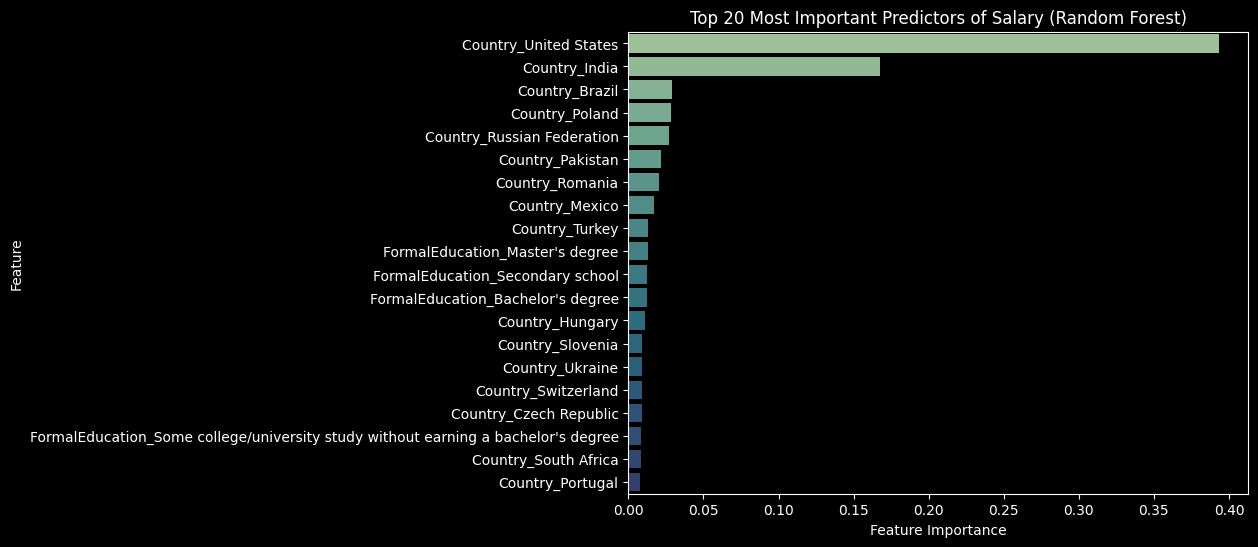

In [9]:
# Prepare modeling dataset, start from the same EDA-filtered dataset
model_df = eda_df.copy()

# Log-transform salary (reduces right skew)
model_df["LogSalary"] = np.log10(model_df["Salary"])

# Split languages into separate rows
lang_model_df = (
    model_df[["Salary", "LogSalary", "Country", "FormalEducation", "HaveWorkedLanguage"]]
    .dropna(subset=["HaveWorkedLanguage"])
    .copy()
)
lang_model_df["HaveWorkedLanguage"] = lang_model_df["HaveWorkedLanguage"].str.split(";")
lang_model_df = lang_model_df.explode("HaveWorkedLanguage")
lang_model_df["HaveWorkedLanguage"] = lang_model_df["HaveWorkedLanguage"].str.strip()

# Keep only common languages (>100 respondents)
lang_counts = lang_model_df["HaveWorkedLanguage"].value_counts()
valid_langs = lang_counts[lang_counts >= 100].index
lang_model_df = lang_model_df[lang_model_df["HaveWorkedLanguage"].isin(valid_langs)]

print("Model dataset shape:", lang_model_df.shape)

# Define features and target
X = lang_model_df[["Country", "FormalEducation", "HaveWorkedLanguage"]]
y = lang_model_df["LogSalary"]

# Encode categorical features ---
categorical_features = ["Country", "FormalEducation", "HaveWorkedLanguage"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)]
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build and compare different models

# Linear Regression
linreg_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
linreg_model.fit(X_train, y_train)
y_pred_lr = linreg_model.predict(X_test)

# Random Forest Regressor
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=200, random_state=42)),
    ]
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# Evaluate different models
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name}: R² = {r2:.3f}, RMSE = {rmse:.3f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


# Feature importance Random Forest
rf_feature_names = rf_model.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
rf_importances = rf_model.named_steps["regressor"].feature_importances_

feature_importances_df = (
    pd.DataFrame({"Feature": rf_feature_names, "Importance": rf_importances})
    .sort_values(by="Importance", ascending=False)
    .head(20)
)

print("\nTop 20 predictive features:")
display(feature_importances_df)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=feature_importances_df,
    x="Importance",
    y="Feature",
    hue="Feature",
    legend=False,
    orient="h",
    palette="crest"
)
plt.title("Top 20 Most Important Predictors of Salary (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


#### Part 6.2 – Do developers with formal education (e.g., a university degree) earn higher salaries or report greater job satisfaction than self-taught developers?

Dataset shape: (11739, 5)


,Country,FormalEducation,Salary,JobSatisfaction,LogSalary
0,United Kingdom,Bachelor's degree,113750.0,9.0,5.055951
1,United Kingdom,Professional degree,100000.0,8.0,5.000000
2,United States,Bachelor's degree,130000.0,8.0,5.113943
3,United States,Bachelor's degree,82500.0,3.0,4.916454
4,Israel,Bachelor's degree,100764.0,9.0,5.003305


Salary Mod — R²: 0.549, RMSE: 0.282
Job Satisfaction Mod — R²: 0.019, RMSE: 2.113

Effect of Education on Log(Salary):


,Feature,Coefficient
37,FormalEducation_Doctoral degree,0.149878
40,FormalEducation_Master's degree,0.095401
41,FormalEducation_Primary/elementary school,0.046861
36,FormalEducation_Bachelor's degree,0.016501
38,FormalEducation_I never completed any formal e...,-0.002783
44,FormalEducation_Some college/university study ...,-0.019669
42,FormalEducation_Professional degree,-0.032159
43,FormalEducation_Secondary school,-0.107135
39,FormalEducation_I prefer not to answer,-0.146895


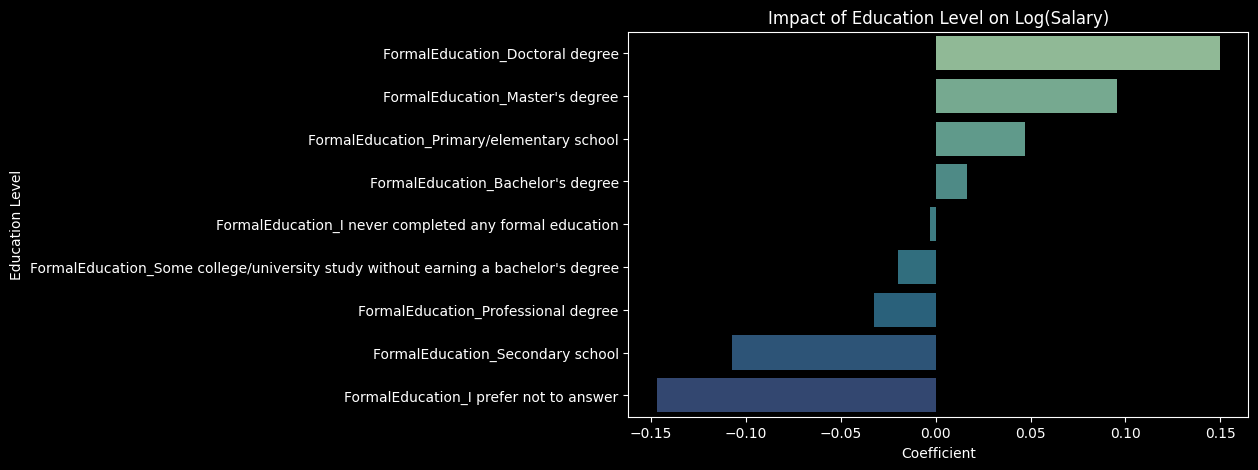

In [10]:
# Prepare dataset
edu_df = eda_df[["Country", "FormalEducation", "Salary", "JobSatisfaction"]].dropna()

# Convert JobSatisfaction to numeric (survey responses categorical)
edu_df["JobSatisfaction"] = pd.to_numeric(edu_df["JobSatisfaction"], errors="coerce")

# Remove invalid or zero salaries
edu_df = edu_df[edu_df["Salary"] > 0]

# Log-transform salary
edu_df["LogSalary"] = np.log10(edu_df["Salary"])

print("Dataset shape:", edu_df.shape)
display(edu_df.head())

# Define features and targets
X = edu_df[["Country", "FormalEducation"]]
y_salary = edu_df["LogSalary"]
y_satisfaction = edu_df["JobSatisfaction"]

# Preprocessor
categorical_features = ["Country", "FormalEducation"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)]
)

# Train/Test Split
X_train, X_test, y_train_sal, y_test_sal = train_test_split(X, y_salary, test_size=0.2, random_state=42)
_, _, y_train_sat, y_test_sat = train_test_split(X, y_satisfaction, test_size=0.2, random_state=42)

# Modeling Salary (Linear Regression)
sal_model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])
sal_model.fit(X_train, y_train_sal)
y_pred_sal = sal_model.predict(X_test)

r2_sal = r2_score(y_test_sal, y_pred_sal)
rmse_sal = np.sqrt(mean_squared_error(y_test_sal, y_pred_sal))

print(f"Salary Mod — R²: {r2_sal:.3f}, RMSE: {rmse_sal:.3f}")

# Modeling Satisfaction (Linear Regression)
sat_model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])
sat_model.fit(X_train, y_train_sat)
y_pred_sat = sat_model.predict(X_test)

r2_sat = r2_score(y_test_sat, y_pred_sat)
rmse_sat = np.sqrt(mean_squared_error(y_test_sat, y_pred_sat))

print(f"Job Satisfaction Mod — R²: {r2_sat:.3f}, RMSE: {rmse_sat:.3f}")

# Extract Coefficients (Education Impact)
feature_names = sal_model.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
coefficients = sal_model.named_steps["regressor"].coef_

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
edu_coef_df = coef_df[coef_df["Feature"].str.contains("FormalEducation")].sort_values(by="Coefficient", ascending=False)

print("\nEffect of Education on Log(Salary):")
display(edu_coef_df.head(10))

# Visualization
plt.style.use("dark_background")

plt.figure(figsize=(8, 5))
sns.barplot(
    data=edu_coef_df,
    x="Coefficient",
    y="Feature",
    hue="Feature",
    legend=False,
    palette="crest",
    orient="h"
)
plt.title("Impact of Education Level on Log(Salary)")
plt.xlabel("Coefficient")
plt.ylabel("Education Level")
plt.show()


#### Part 6.3 – Which countries show the largest discrepancies between income and satisfaction?

Top 10 countries with higher satisfaction than salary level:



,Country,MedianSalary,MedianSatisfaction,Gap_z
18,Mexico,12918.660287,8.0,2.065389
25,Romania,18733.489461,8.0,1.814938
5,Bulgaria,19459.459459,8.0,1.783670
7,Czech Republic,19577.133908,8.0,1.778601
12,Greece,21505.376344,8.0,1.695550
13,Hungary,22063.194450,8.0,1.671524
28,South Africa,32739.420935,8.0,1.211688
33,Ukraine,17861.409797,7.5,0.938418
2,Austria,45161.290323,8.0,0.676665
9,Finland,46236.559140,8.0,0.630352



Bottom 10 countries with high salary but low satisfaction:



,Country,MedianSalary,MedianSatisfaction,Gap_z
1,Australia,67045.454545,7.0,-2.094070
15,Ireland,62365.591398,7.0,-1.892504
11,Germany,53570.967742,7.0,-1.513710
35,United States,93250.000000,8.0,-1.394566
14,India,7781.529878,6.0,-1.369673
34,United Kingdom,48750.000000,7.0,-1.306066
31,Switzerland,90500.000000,8.0,-1.276121
10,France,40860.215054,7.0,-0.966245
3,Belgium,37634.408602,7.0,-0.827306
29,Spain,32258.064516,7.0,-0.595741


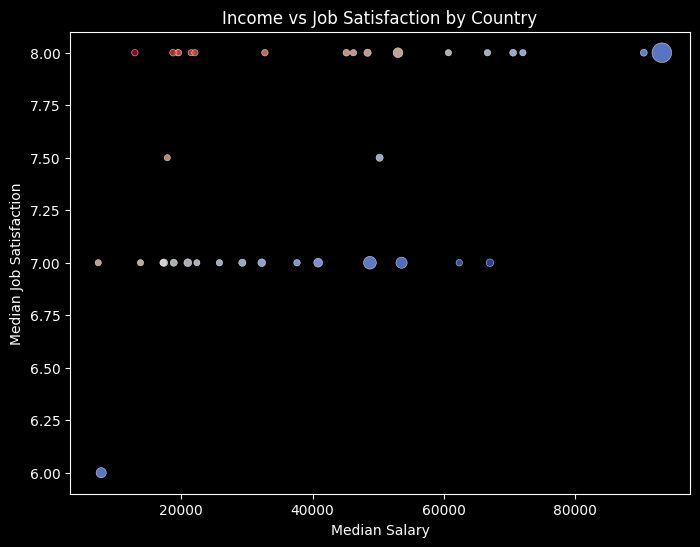

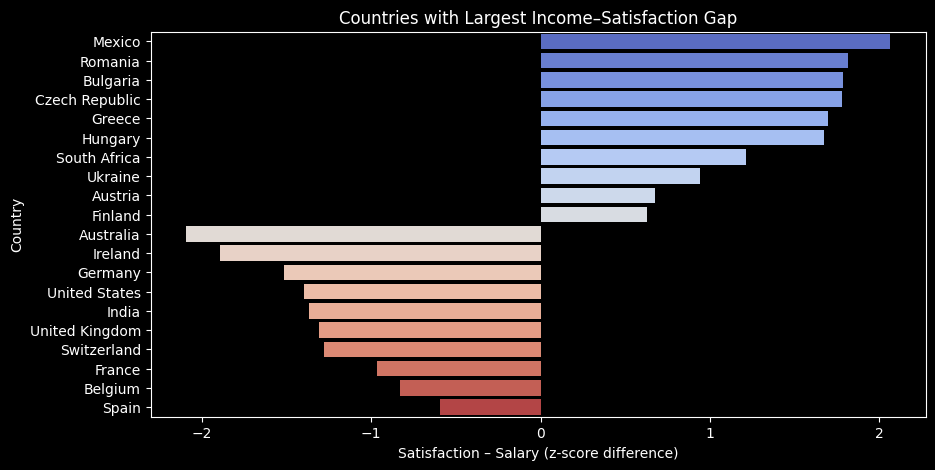

In [11]:
plt.style.use("dark_background")

# Prepare dataset
country_df = eda_df[["Country", "Salary", "JobSatisfaction"]].dropna()

# Remove non realistic salary values to be safe
country_df = country_df[country_df["Salary"].between(1000, 250000)]

# Convert JobSatisfaction to numeric (if necessary)
country_df["JobSatisfaction"] = pd.to_numeric(country_df["JobSatisfaction"], errors="coerce")

# Aggregate by country
country_stats = (
    country_df.groupby("Country")
    .agg(
        MedianSalary=("Salary", "median"),
        MedianSatisfaction=("JobSatisfaction", "median"),
        Count=("Country", "size")
    )
    .reset_index()
)

# Keep countries with sufficient data (≥ 50 responses)
country_stats = country_stats[country_stats["Count"] >= 50]

# Normalize (z-score) for comparability
country_stats["Salary_z"] = (country_stats["MedianSalary"] - country_stats["MedianSalary"].mean()) / country_stats["MedianSalary"].std()
country_stats["Satisfaction_z"] = (country_stats["MedianSatisfaction"] - country_stats["MedianSatisfaction"].mean()) / country_stats["MedianSatisfaction"].std()

# Compute gap (Positive → Satisfaction higher than expected for salary, Negative → High salary, but relatively low satisfaction)
country_stats["Gap_z"] = country_stats["Satisfaction_z"] - country_stats["Salary_z"]

# Identify top/bottom countries
top_gap = country_stats.sort_values("Gap_z", ascending=False).head(10)
bottom_gap = country_stats.sort_values("Gap_z", ascending=True).head(10)

print("Top 10 countries with higher satisfaction than salary level:\n")
display(top_gap[["Country", "MedianSalary", "MedianSatisfaction", "Gap_z"]])

print("\nBottom 10 countries with high salary but low satisfaction:\n")
display(bottom_gap[["Country", "MedianSalary", "MedianSatisfaction", "Gap_z"]])

# Visualization Income vs Satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=country_stats,
    x="MedianSalary",
    y="MedianSatisfaction",
    hue="Gap_z",
    palette="coolwarm",
    size="Count",
    sizes=(20, 200),
    alpha=0.8,
    legend=False
)
plt.title("Income vs Job Satisfaction by Country")
plt.xlabel("Median Salary")
plt.ylabel("Median Job Satisfaction")
plt.show()

# Visualization Top and Bottom Gaps
plt.figure(figsize=(10, 5))
sns.barplot(
    data=pd.concat([top_gap, bottom_gap]),
    x="Gap_z",
    y="Country",
    hue="Country",
    legend=False,
    orient="h",
    palette="coolwarm"
)
plt.title("Countries with Largest Income–Satisfaction Gap")
plt.xlabel("Satisfaction – Salary (z-score difference)")
plt.ylabel("Country")
plt.show()

### Part 7 – Evaluation & Interpretation

#### Part 7.1 - Which programming languages are associated with higher salaries?

### Model Performance

Both models achieve solid but not perfect predictive power:

| Model | R² | RMSE |
|--------|----|------|
| **Linear Regression** | **0.57** | 0.278 |
| **Random Forest** | **0.53** | 0.291 |

An R² of **0.57** means that roughly 57 % of the variation in log-transformed salaries can be explained by the combination of country, education, and programming language.  
This is a strong result, given that many personal and company-level factors (experience, company size, job role, etc.) are not included.  
The Linear Regression slightly outperforms the Random Forest, indicating that most relationships are largely linear and additive rather than highly nonlinear.


### Feature Importance (Random Forest)

The Random Forest model shows that **country effects dominate salary variation**.

| Rank | Feature | Importance | Interpretation |
|------|----------|-------------|----------------|
| 1 | `Country_United States` | 0.39 | Being located in the U.S. has the strongest positive association with higher salary. |
| 2 | `Country_India` | 0.17 | Salaries in India differ systematically (lower scale, but high internal variation). |
| 3 – 10 | Other countries (Brazil, Poland, Russia, etc.) | ~0.01 – 0.03 | Country remains the single largest explanatory factor. |
| 11 – 15 | `FormalEducation_Master’s`, `Bachelor’s`, `Secondary school` | ~0.01 | Education level adds a smaller, but consistent effect. |
| – | `HaveWorkedLanguage_*` | *not in top 20* | Programming languages explain little once country and education are controlled for. |


### Key Insights

- **Geography dominates.**  
  Salary differences between countries outweigh almost all other effects.  
  Developers in the U.S. and Western Europe earn substantially more than in Asia or Eastern Europe.

- **Education matters, but modestly.**  
  Having a Master’s or Bachelor’s degree is associated with slightly higher salaries, but the effect is small compared to location.

- **Programming languages have limited marginal impact.**  
  Once location and education are included, the specific programming language contributes little additional explanatory power.  
  → Skills and market context (where you work, for whom, and at what seniority) matter more than the language itself.

- **Linear patterns dominate.**  
  The slightly higher R² of the linear model suggests salary differences follow relatively stable, additive trends.


### Limitations

- Currency inconsistencies in the 2017 survey (values not normalized to USD).  
- Missing variables such as years of experience, company size, or job type.  
- The model captures **associations**, not causal relationships.


### Conclusion

> Programming language choice is not a strong independent predictor of salary once geography and education are controlled for.  
> The clearest salary drivers are country (especially the U.S.) and formal education level.  
> This finding underscores that context, seniority, and experience outweigh the specific programming language in determining compensation.


#### Part 7.2 - Do developers with formal education (e.g., a university degree) earn higher salaries or report greater job satisfaction than self-taught developers?

#### Model Performance
| Model | R² | RMSE |
|--------|----|------|
| **Salary (Log)** | **0.55** | 0.282 |
| **Job Satisfaction** | **0.02** | 2.11 |

- The salary model explains roughly **55 % of the variance** in log-transformed salaries — a strong result for only two predictors (country + education).  
- The job satisfaction model explains almost **no variance** (R² ≈ 0.02).  
  → Job satisfaction depends on many personal and organizational factors not captured here (team culture, workload, autonomy, etc.).

---

#### Education Effects on Salary (Coefficients)

| Education Level | Coefficient (on log salary) | Interpretation |
|------------------|-----------------------------|----------------|
| Doctoral degree | **+ 0.15** | Highest positive impact on salary |
| Master’s degree | **+ 0.10** | Strong, consistent benefit |
| Bachelor’s degree | **+ 0.02** | Small but positive effect |
| Some college / incomplete studies | – 0.02 | Slightly below Bachelor’s |
| Professional degree | – 0.03 | Mixed outcomes, often domain-specific |
| Secondary school | – 0.11 | Clearly below university graduates |
| Prefer not to answer | – 0.15 | Lowest reported earnings |

A coefficient of + 0.10 on log-salary corresponds roughly to **25 % higher actual salary** compared to the baseline category.

---

#### Key Insights

- Formal education strongly correlates with higher income, even after controlling for country.  
  → Developers with Master’s or Doctoral degrees earn substantially more on average.  

- Job satisfaction shows almost no relationship with formal education.  
  → Developers without a degree can be equally satisfied in their work.  

- Bachelor’s degrees appear to be the baseline, with diminishing marginal returns for additional degrees.  
  → The jump from no degree → Bachelor’s is large; further education adds smaller increments.

- Professional degrees (e.g., law, medicine) are not aligned with higher software-developer salaries — likely reflecting cross-disciplinary respondents.

---

#### Limitations

- Currency inconsistencies remain from the raw survey data.  
- No control for experience, company type, or seniority, which likely co-vary with education.  
- The model shows correlation, not causation — higher-earning individuals may simply have had more opportunities for advanced education.

---

#### Conclusion

> Formal education is a significant predictor of income, but not of job satisfaction.  
> The data suggest that advanced degrees can improve earning potential,  
> while satisfaction depends on entirely different, non-academic factors.

#### Part 7.3 - Which countries show the largest discrepancies between income and satisfaction?

#### Model Summary
To compare economic and subjective well-being among developers,  
median salary and median job satisfaction were computed for each country (n ≥ 50).  
Both variables were normalized (z-scores), and the **gap** was calculated as:

> **Gap = Satisfaction_z – Salary_z**

- **Positive Gap** → Developers report *higher satisfaction than expected* based on salary levels.  
- **Negative Gap** → Developers report *lower satisfaction despite higher pay.*

---

#### Top 10 Countries — “Happy despite lower pay”

| Country | Median Salary | Median Satisfaction | Gap (z-score) |
|----------|---------------|--------------------|---------------|
| **Mexico** | 12 918 USD | 8.0 | **+2.07** |
| **Romania** | 18 733 USD | 8.0 | **+1.81** |
| **Bulgaria** | 19 459 USD | 8.0 | **+1.78** |
| **Czech Republic** | 19 577 USD | 8.0 | **+1.78** |
| **Greece** | 21 505 USD | 8.0 | **+1.70** |
| **Hungary** | 22 063 USD | 8.0 | **+1.67** |
| **South Africa** | 32 739 USD | 8.0 | **+1.21** |
| **Ukraine** | 17 861 USD | 7.5 | **+0.94** |
| **Austria** | 45 161 USD | 8.0 | **+0.68** |
| **Finland** | 46 237 USD | 8.0 | **+0.63** |

➡ Developers in several Eastern European and emerging market countries  
report remarkably high job satisfaction *despite* lower median incomes.  
This suggests non-monetary factors such as work-life balance, community, or growth opportunities.

---

#### Bottom 10 Countries — “Wealthy but less happy”

| Country | Median Salary | Median Satisfaction | Gap (z-score) |
|----------|---------------|--------------------|---------------|
| **Australia** | 67 045 USD | 7.0 | **–2.09** |
| **Ireland** | 62 366 USD | 7.0 | **–1.89** |
| **Germany** | 53 571 USD | 7.0 | **–1.51** |
| **United States** | 93 250 USD | 8.0 | **–1.39** |
| **India** | 7 782 USD | 6.0 | **–1.37** |
| **United Kingdom** | 48 750 USD | 7.0 | **–1.31** |
| **Switzerland** | 90 500 USD | 8.0 | **–1.28** |
| **France** | 40 860 USD | 7.0 | **–0.97** |
| **Belgium** | 37 634 USD | 7.0 | **–0.83** |
| **Spain** | 32 258 USD | 7.0 | **–0.60** |

➡ High-income countries (e.g., **Australia**, **Germany**, **U.S.**) show **lower relative satisfaction**.  
Possible explanations include higher living costs, longer work hours, or stronger performance pressure.

---

#### Key Insights

- **Cultural and contextual factors dominate:**  
  Salary alone does not determine happiness — developers in modest-income regions often feel equally or more satisfied.  

- **Eastern Europe stands out positively:**  
  High satisfaction at moderate pay may reflect strong community culture or growing tech opportunities.  

- **Western Europe & Anglosphere show a satisfaction deficit:**  
  Despite high income levels, subjective fulfillment is weaker — potentially due to work intensity or burnout culture.  

---

#### Conclusion

> Developer satisfaction is not tightly coupled to income.  
> Countries with lower pay often report *higher morale and satisfaction*,  
> whereas some high-income nations show a relative *well-being gap*.  
> This highlights the importance of non-financial job factors — autonomy, purpose, work-life balance — in overall developer happiness.

### Part 8 – Communication & Export

In [12]:
# project root as parent folder of this notebook's folder
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
reports_dir = os.path.join(project_root, "reports")

# Create ../reports if it doesn't exist
os.makedirs(reports_dir, exist_ok=True)

# Summary Tables
# 1) Top Programming Languages (expects median_salary_by_lang from Section 5.4)
top_langs_export = median_salary_by_lang.head(10).reset_index()
top_langs_export.columns = ["Programming Language", "Median Salary"]

# 2) Education Effect Summary (expects edu_coef_df from Section 6B.7)
edu_effect_export = edu_coef_df.copy()
edu_effect_export.columns = ["Feature", "Coefficient"]

# 3) Country Income–Satisfaction Gap (expects top_gap & bottom_gap from Section 6C.5)
gap_export = pd.concat([top_gap, bottom_gap]).copy()
gap_export = gap_export[["Country", "MedianSalary", "MedianSatisfaction", "Gap_z"]]

# Save to CSV
top_langs_csv = os.path.join(reports_dir, "top10_languages_salary.csv")
edu_coef_csv = os.path.join(reports_dir, "education_salary_coefficients.csv")
gap_csv = os.path.join(reports_dir, "country_income_satisfaction_gap.csv")

top_langs_export.to_csv(top_langs_csv, index=False)
edu_effect_export.to_csv(edu_coef_csv, index=False)
gap_export.to_csv(gap_csv, index=False)

# Generate Markdown Summary (to ../reports/summary_export.md)
summary_md_path = os.path.join(reports_dir, "summary_export.md")

summary_md = f"""# Developer Insights Report — Stack Overflow 2017

**Generated:** {datetime.now():%Y-%m-%d %H:%M}

## 1. Top Programming Languages by Median Salary
Based on cleaned and filtered data (n ≥ 20 per language):

{top_langs_export.to_markdown(index=False)}



## 2. Effect of Formal Education on Salary
Coefficients from Linear Regression (log-transformed salary):

{edu_effect_export.head(8).to_markdown(index=False)}



## 3. Countries with the Largest Income–Satisfaction Gap
Positive = higher satisfaction than expected, Negative = lower satisfaction despite higher income.

{gap_export.to_markdown(index=False)}


*All results based on Stack Overflow Developer Survey 2017 (sample = filtered subset).*
"""

with open(summary_md_path, "w", encoding="utf-8") as f:
    f.write(summary_md)

print("✅ Export complete:")
print(summary_md_path)
print(top_langs_csv)
print(edu_coef_csv)
print(gap_csv)


✅ Export complete:
c:\Users\P319970\git_delivery\git__project1\reports\summary_export.md
c:\Users\P319970\git_delivery\git__project1\reports\top10_languages_salary.csv
c:\Users\P319970\git_delivery\git__project1\reports\education_salary_coefficients.csv
c:\Users\P319970\git_delivery\git__project1\reports\country_income_satisfaction_gap.csv


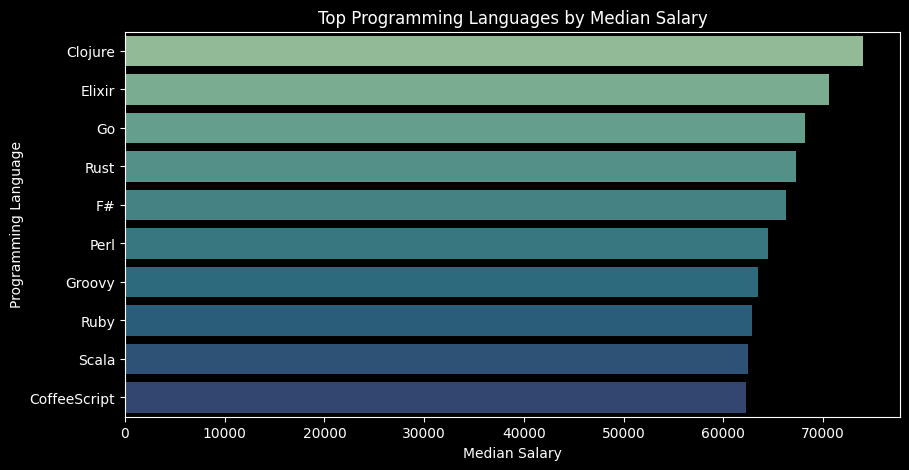

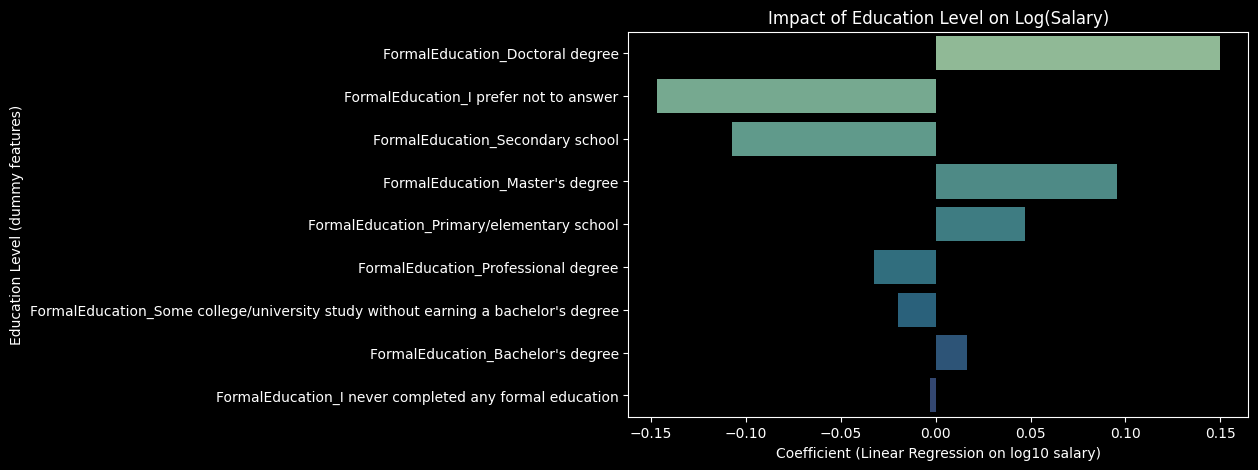

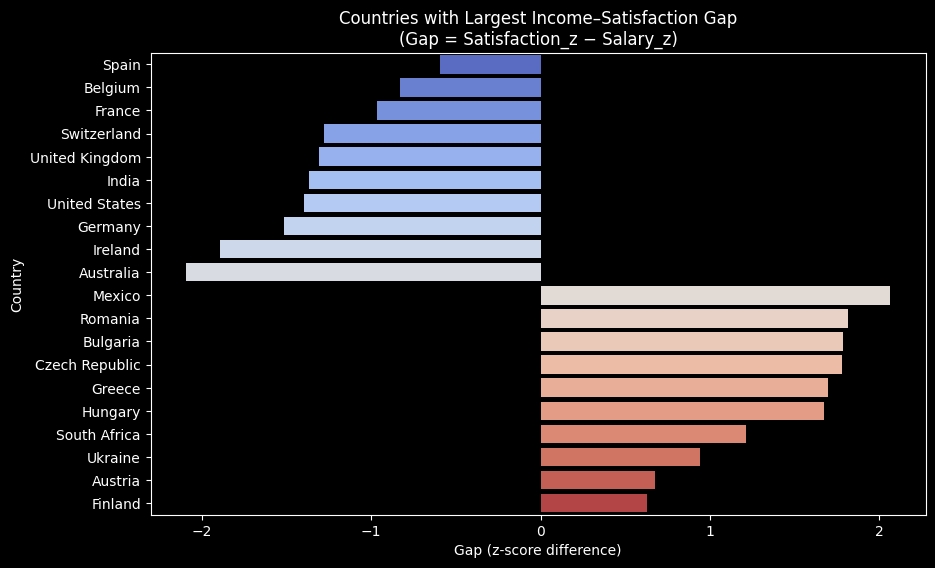

Saved files:
  top_languages: c:\Users\P319970\git_delivery\git__project1\reports\top10_languages_salary.png
  education_coeffs: c:\Users\P319970\git_delivery\git__project1\reports\education_salary_coefficients.png
  country_gap: c:\Users\P319970\git_delivery\git__project1\reports\country_income_satisfaction_gap.png


In [14]:
# blog pictures for blog_post.md

plt.style.use("dark_background")
sns.set_palette("deep")

# Resolve project root (parent of the current working directory, which is usually notebooks/)
NOTEBOOK_DIR = os.getcwd()
PROJECT_ROOT = os.path.abspath(os.path.join(NOTEBOOK_DIR, ".."))
REPORTS_DIR = os.path.join(PROJECT_ROOT, "reports")
os.makedirs(REPORTS_DIR, exist_ok=True)

def save_fig(stem, fig=None, dpi=300, tight=True):
    """
    Save current or given figure to ../reports/<stem>.png (and optionally .svg).
    Returns the PNG path.
    """
    if fig is None:
        fig = plt.gcf()
    png_path = os.path.join(REPORTS_DIR, f"{stem}.png")
    if tight:
        fig.savefig(png_path, dpi=dpi, bbox_inches="tight")
    else:
        fig.savefig(png_path, dpi=dpi)
    return png_path

# Plot 1: Top languages by median salary
def plot_top_languages(median_salary_by_lang, n_top=10):
    """
    Expects a pandas Series: index=Language, values=Median Salary.
    Creates a horizontal barplot with hue (future-proof for seaborn ≥0.14).
    """
    if not isinstance(median_salary_by_lang, (pd.Series, pd.DataFrame)):
        raise ValueError("median_salary_by_lang must be a pandas Series or DataFrame.")
    s = median_salary_by_lang.head(n_top)
    df = s.reset_index()
    if df.shape[1] == 2:
        df.columns = ["Language", "MedianSalary"]
    else:
        df = df.iloc[:, :2]
        df.columns = ["Language", "MedianSalary"]

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(
        data=df,
        x="MedianSalary",
        y="Language",
        hue="Language",    
        legend=False,
        orient="h",
        palette="crest"
    )
    plt.xlabel("Median Salary")
    plt.ylabel("Programming Language")
    plt.title("Top Programming Languages by Median Salary")
    return ax

# Plot 2: Education impact on salary (coefficients)
def plot_education_coefficients(edu_coef_df, top_k=None):
    """
    Expects DataFrame with columns: ['Feature','Coefficient'] from the linear model.
    Plots only entries containing 'FormalEducation'. Use top_k to limit rows by magnitude.
    """
    if not {"Feature", "Coefficient"}.issubset(set(edu_coef_df.columns)):
        raise ValueError("edu_coef_df must have columns: ['Feature','Coefficient']")

    df = edu_coef_df.copy()
    df = df[df["Feature"].str.contains("FormalEducation", na=False)]
    # sort by absolute effect (descending)
    df = df.reindex(df["Coefficient"].abs().sort_values(ascending=False).index)
    if top_k:
        df = df.head(top_k)

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df,
        x="Coefficient",
        y="Feature",
        hue="Feature",
        legend=False,
        orient="h",
        palette="crest"
    )
    plt.title("Impact of Education Level on Log(Salary)")
    plt.xlabel("Coefficient (Linear Regression on log10 salary)")
    plt.ylabel("Education Level (dummy features)")
    return ax

# Plot 3: Countries with largest income–satisfaction gap
def plot_country_gap(top_gap_df, bottom_gap_df):
    """
    Expects two DataFrames each with columns: ['Country','MedianSalary','MedianSatisfaction','Gap_z'].
    Concatenates them and plots the z-score gap (Satisfaction_z - Salary_z).
    """
    req_cols = {"Country", "MedianSalary", "MedianSatisfaction", "Gap_z"}
    for name, df in [("top_gap_df", top_gap_df), ("bottom_gap_df", bottom_gap_df)]:
        if not req_cols.issubset(set(df.columns)):
            raise ValueError(f"{name} must contain columns: {req_cols}")

    comb = pd.concat([top_gap_df.assign(Group="Positive gap"),
                      bottom_gap_df.assign(Group="Negative gap")], axis=0)
    # order: positive first descending, then negative ascending
    comb = comb.sort_values(["Group", "Gap_z"], ascending=[True, False])

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=comb,
        x="Gap_z",
        y="Country",
        hue="Country",
        legend=False,
        orient="h",
        palette="coolwarm"
    )
    plt.title("Countries with Largest Income–Satisfaction Gap\n(Gap = Satisfaction_z − Salary_z)")
    plt.xlabel("Gap (z-score difference)")
    plt.ylabel("Country")
    return ax


# Generate blog images and save to ../reports
paths = {}

# 1 Top languages
ax1 = plot_top_languages(median_salary_by_lang, n_top=10)
paths["top_languages"] = save_fig("top10_languages_salary")
plt.show()

# 2 Education coefficients 
ax2 = plot_education_coefficients(edu_coef_df, top_k=None)
paths["education_coeffs"] = save_fig("education_salary_coefficients")
plt.show()

# 3 Country gap
ax3 = plot_country_gap(top_gap, bottom_gap)
paths["country_gap"] = save_fig("country_income_satisfaction_gap")
plt.show()

print("Saved files:")
for k, v in paths.items():
    print(f"  {k}: {v}")


### Part 9 – Conclusion

This project explored insights from the **Stack Overflow Developer Survey 2017**,  
focusing on three key questions that connect technology, education, and geography with developer outcomes.



#### 1 - Which programming languages are associated with the highest salaries?
Analysis shows that **languages such as Go, Scala, and Groovy** tend to be linked with the highest median salaries.  
However, this effect disappears once country and education are controlled for.  
→ **Language choice alone does not determine income**; it mostly reflects specialization and seniority rather than inherent market value.



#### 2 - Do developers with formal education earn more or report greater satisfaction?
Formal education is **strongly correlated with higher income**,  
especially at the **Master’s and Doctoral** levels.  
Yet, it shows **almost no relationship with job satisfaction**.  
→ Developers without formal degrees can be equally happy in their work,  
emphasizing that **career fulfillment is driven by non-academic factors** such as autonomy, growth, and culture.



#### 3 - Which countries show the largest gaps between income and satisfaction?
Several **Eastern European** and **emerging-market** countries (e.g., Romania, Bulgaria, Mexico)  
report **high satisfaction despite modest pay**,  
while high-income nations (e.g., Germany, U.S., Australia) exhibit **lower relative satisfaction**.  
→ **Money does not buy happiness** — cultural, social, and lifestyle factors play a major role in perceived well-being.



#### Overall Insights
- **Context outweighs code.** Location, education, and work environment explain more salary variation than the specific programming language.  
- **Happiness ≠ Income.** Satisfaction depends on qualitative aspects of work, not purely financial ones.  
- **Data storytelling matters.** Combining statistical rigor with clear communication helps bridge the gap between technical analysis and real-world understanding.



#### Next Steps
Future work could integrate:
- **Years of experience** and **job role** variables for more granular salary modeling  
- **Time-series comparison** with newer Stack Overflow surveys to observe how these dynamics evolve  
- **Interactive dashboards** (e.g., Power BI or Plotly) for visual exploration



> **In summary:**  
> Data reveals not just how developers earn — but how they feel.  
> The balance between skill, education, and satisfaction reminds us that technology careers are shaped as much by human context as by code.